# K-Nearest Neighbors

**Author: Carleton Smith; W.P.G. Peterson**

**Revised: Jessica Cervi**

**Expected time = 3 hours**

**Total points = 95 points**


## Assignment Overview

K-Nearest Neighnours (KNN) is a reasonably simple algorithm that is easy to grasp and can be very effective. This assignment will test your abilities in three different parts. In the first part, you will familiarize yourself with the problem and data. In the second part, you will code a KNN Classifier from scratch, evaluate performance, and compare to Scikit-Learn's implementation. Finally, in the last part you will interpret results and explain findings.


In the first part,  we will revisit Bayes' formula and evaluate your ability to calculate simple Bayesian posterior probabilities. In the second part, we will ask you to build functions that calculate the parameters of Bayesian posteriors for Bayesian Linear Regression. 

This assignment is designed to build your familiarity and comfort coding in Python while also helping you review key topics from each module. As you progress through the assignment, answers will get increasingly complex. It is important that you adopt a data scientist's mindset when completing this assignment. **Remember to run your code from each cell before submitting your assignment.** Running your code beforehand will notify you of errors and give you a chance to fix your errors before submitting it. You should view your Vocareum submission as if you are delivering a final project to your manager or client. 

***Vocareum Tips***
- Do not add arguments or options to functions unless asked specifically. This will cause an error in Vocareum.
- Do not use a library unless asked explicitly in the question. 
- You can download the Grading Report after submitting the assignment. It will include the feedback and hints on the incorrect questions. 


### Learning Objectives 

- Have a firm understanding of KNN algorithm
- Practice running through the data science workflow to solve a problem
- Demonstrate how to translate a mathematical algoritm into effective code 
- Understand common pitfalls when working with distances 
- Determine class balance in classification problems 
- Use Euclidian-distance to find the distance between vectors
- Code KNN from scratch  
- Implement KNN using sklearn


## Index: 

#### K-Nearest Neighbors

- [Question 1](#q1)
- [Question 2](#q2)
- [Question 3](#q3)
- [Question 4](#q4)
- [Question 5](#q5)
- [Question 6](#q6)
- [Question 7](#q7)
- [Question 8](#q8)
- [Question 9](#q9)
- [Question 10](#q10)
- [Question 11](#q11)







## K-Nearest Neighbors

### Importing the data set and exploratory data analysis

For this assignment, we will be using a database from the UC Irvine Machine Learning Repositiory that can be downloaded from the following link:
[_Human Activity Recognition Using Smartphones Data Set_](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).  

Please see the [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/) to explore the data files further.

In this assignment, we will try to classify the type of activity a person is performing based on measurements collected from a smartphone. The activities include:  
- Walking
- Walking_Upstairs
- Walking_Downstairs
- Sitting
- Standing
- Laying



Before coding an algorithm, we will take a look at our data using `Python`'s `pandas`. For visualizations, we will use the `matplotlib` ans `seaborn` libraries.

Let's import the necessary libraries and load the datasets. We will be using using the pandas `pd.read_table()` function. 

In [1]:
# Import the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
FEATURE_NAMES = './data/features.txt'
TRAIN_DATA = './data/X_train.txt'
TRAIN_LABELS = './data/y_train.txt'

In [3]:
# Load the data into a `pandas` DataFrame objects

# read feature names
feats = pd.read_csv(FEATURE_NAMES, sep='\n', header=None)

# read in training data
har_train = pd.read_csv(TRAIN_DATA, sep='\s+', header=None)

# read in training labels
har_train_labels = pd.read_csv(TRAIN_LABELS, sep='\n', header=None, names=["label"], squeeze = True)

First, using the function `head()`, we print the first five rows of the training data (`har_train`) to understand what the dataframe looks like.

In [4]:
har_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


[Back to top](#Index:) 
<a id='q1'></a>

### Question 1:

*5 points*

Find out how many rows and columns are in har_train. Assign your answer to the variable `ans1`.

In [5]:
### GRADED

### YOUR ANSWER BELOW
#to know rows and columns just un_comment this
#har_train.shape
ans1 = (7352, 561)
###
### YOUR CODE HERE
###


In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Next, we visualize the first 5 rows of the DataFrame of feature names `feats`.

In [7]:
feats.head()

,0
0,1 tBodyAcc-mean()-X
1,2 tBodyAcc-mean()-Y
2,3 tBodyAcc-mean()-Z
3,4 tBodyAcc-std()-X
4,5 tBodyAcc-std()-Y


Finally, we assign each feature name in `feats` to each column of `har_train` using the `.columns` attribute and we visuaize the first 5 rows.

In [8]:
har_train.columns = feats.iloc[:,0]
har_train.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


[Back to top](#Index:) 
<a id='q2'></a>

### Question 2:

*10 points*

Use the `iloc()` function to extract the first 20 features of the dataframe `har_train`. Save this new dataframe to `first_twenty`.


Next, using the `seaborn` library create a heatmap for the correlation matrix. 

First you have to create the correlation matrix from the pandas dataframe (save it in a dataframe called `corr`) and then plot it using seaborn with these customizations:

- Set the seaborn style to white.
- Generate a mask using `np.triu(np.ones_like())` with the dtype as boolean to only show the lower triangle of the correlation matrix. Save it in a variable called `mask`.
- Set up the figure with matplotlib with `figsize=(11,9)`. Use `fig, ax = ...`
- Generate a custom diverging colormap for the heatmap with the arguments `(220, 10, as_cmap=True)`. Save it in a variable called `cmap`.
- Draw the heatmap with the mask and correct aspect ratio,  using the arguments `corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})`.

You can find more information about how to create a heatmap using seaborn [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

The final plot should look like this:

![](assets/q2.png)

**Save your plot as a png with the name "plot2.png" in the folder "results".**



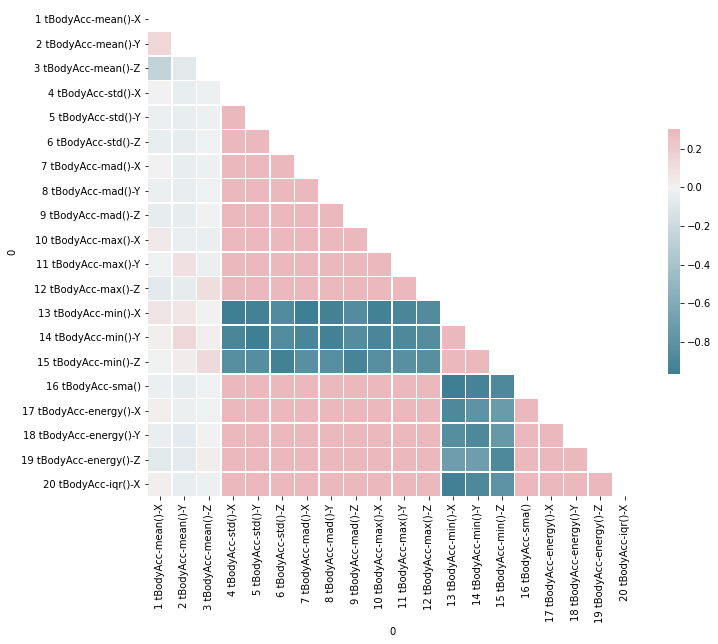

In [14]:
###
### YOUR CODE HERE
###
# seaborn
first_twenty = har_train.iloc[:, :20] # pull out first 20 feats
corr = first_twenty.corr()  # compute correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)  # make mask
mask[np.triu_indices_from(mask)] = True  # mask the upper triangle

fig, ax = plt.subplots(figsize=(11, 9))  # create a figure and a subplot
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # custom color map
plot = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax =.3,
    center=0,
    square = True,
    linewidth=0.5,
    cbar_kws={'shrink': .5}
);

### YOUR ANSWER BELOW
plot.figure.savefig("results/plot2.png")

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


As you know, exploratory data analysis (EDA) is used to develop an idea what the data we are about to work with looks like. In particular, looking for Null values and correlated features are important steps in order to:  

1. See if any features will not be useful in models because of null values.
2. See if any model assumptions are violated by correlated features (such as in linear / logistic regression).

For the next question, we will use the dataframe containing the the target variable (`har_train_labels`).

[Back to top](#Index:) 
<a id='q3'></a>

### Question 3:

*5 points*

How many times does the majority class appear in our data? How many times does the minority class appear in our  target data?
Assign these values to `ans_maj` and `ans_min`, respectively.

In [21]:
### GRADED


### YOUR ANSWER BELOW
# for checking the count of max and min class

# har_train_labels.value_counts()

ans_maj = 1407
ans_min = 986

###
### YOUR CODE HERE
###


In [20]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


As an observation, a large imbalance in the distribution of the target variable categories can cause machine learning algorithms to perform differently. In this case, the algorithm can perform well with the majority class and poorly on the minority class.

As a final note, EDA should be performed at the beginning of each project and should be tailored to your specific problem to develop and understanding of the data for a particular purpose. Sometimes this could be a time consuming process when the data are large with many features.

Note that the above example shows just a few of the actions you can perform for EDA


Having performed EDA, we define a "test" data-set that will help us evaluate different models.  

The attribute `train_test_split` from the `sklearn.model_selection` module provides an easy way to do this.  

For this exercise we set `test_size=.3` and `random_state=24` for reproducibility.

In [22]:
from sklearn.model_selection import train_test_split

# give to targets and observations conventional names
y = har_train_labels 
X = har_train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=24)

## Code K-Nearest Neighbours (KNN)

Note: The following example was adapted from example 2.1.2 in Chapter 2 of [_Machine Learning in Action_ by Peter Harrington](https://www.manning.com/books/machine-learning-in-action).

Before fitting a model using KNN and the built-in modules of the `sklearn` package, we will code our own version of KNN from scratch.  

As you know, KNN calculates the distance between the value (or a vector) that we want to classify and all other values (or vectors) in the training data-set. Then, the "`k`" nearest neighbors are classified based on their "label" and the majority is given to the predicted value. 

Thus, our final goal  will be to  define a function `costum_knn` that accepts the following parameters:

- A single data point to be classified (`input_vector`)
- Training data (`X_train`)   
- Labels for training data (`y_train`)
- Value of `k` (some positive integer)



**Function definition:**  
`def costum_knn(input_vector, X_train, y_train, k)`  

**Pseudo Code:**  
```
for every point in our dataset:
    calculate the distance between the current point and input_vector
    sort the distances in increasing order
    take k items with lowest distances from input_vector
    find the majority class among these items
    return the majority class label from the k closest neighbors
```

**Return:**   
- The prediction for `input_vector`  


We will begin by defining some auxiliary functions that we will need to build our KNN algorithm from scratch.

[Back to top](#Index:) 
<a id='q4'></a>

### Question 4:

*5 points*
 
Find the Euclidean distance between the points p1 = (1,2,3,-4,6) and p2 = (10,2,32,-2,0), defined below.
Assign the distance as a float to `ans4`.

In [40]:
### GRADED

### YOUR ANSWER BELOW

p1 = (1,2,3,-4,6)
p2 = (10,2,32,-2,0)

def euclidean_distance(p1, p2):
    distance = 0
    for a, b in zip(p1, p2):
        distance += (a-b)**2
    return distance**.5


ans4 = float(euclidean_distance(p1, p2))

ans4

###
### YOUR CODE HERE
###


31.016124838541646

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q5'></a>

### Question 5:

*5 points*

Define a function called `euclid_dist` that takes an input of two points represented as tuples in the format `p1 = (a1, b1,...n1)` and `p2 = (a2, b2, ...n2)`. Your function should return the the euclidean distance between the two points.

In [44]:
### GRADED

### YOUR ANSWER BELOW

def euclid_dist(p1, p2):
    """
    Calculate the Euclidian Distance between two points
    
    Positional Arguments:
        p1 -- A tuple of n numbers
        p2 -- A tuple of n numbers
    
    Example:
        p1 = (5,5)
        p2 = (0,0)
        p3 = (5,6,7,8,9,10)
        p4 = (1,2,3,4,5,6)
        print(euclid_dist(p1,p2)) #--> 7.0710678118654755
        print(euclid_dist(p3,p4)) #--> 9.797958971132712
    """
    dist = 0
    for a, b in zip(p1, p2):
        dist += (a-b)**2
    return dist**.5   # ** for square 

p1 = (5,5)
p2 = (0,0)

p3 = (5,6,7,8,9,10)
p4 = (1,2,3,4,5,6)
    
print(euclid_dist(p1, p2))
print(euclid_dist(p3, p4))


7.0710678118654755
9.797958971132712


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Distances with `numpy`

In the KNN functions that we will define later in the assignment we will use the library `numpy` to calculate the distance more efficiently.

This can be done via the following code : `np.linalg.norm(p1-p2)`.  

 
Now that we can easily calculate the distances between any two points, we can start building our function.

[Back to top](#Index:) 
<a id='q6'></a>

### Question 6:

*10 points*


Define a function a function called "all_distances" that takes as inputs: an observation from a data set, e.g: `har_train.iloc[50,:]`, and the full data set, e.g. `har_train`.

Your function should create a `list` or `numpy array` with the distances between that observation point and all points in the full dataset. Your function should return a list `dists` with distances sorted from smallest to largest.

Hints: Use `np.linalg.norm()` to find dists as described in the above cell. The smallest distance should be 0. Additionally, use the function `np.apply_along_axis` to apply this function over the columns (axis 1). You can find additional documentation about this function
[here](https://numpy.org/doc/1.18/reference/generated/numpy.apply_along_axis.html).

In [46]:
### GRADED

### YOUR ANSWER BELOW


def all_distances(test_point, data_set):
    """
    Find and return a list of distances between the "test_point"
    and all the points in "data_set", sorted from smallest to largest.
    
    Positional Arguments:
        test_point -- a Pandas Series corresponding to a row in "data_set"
        data_set -- a Pandas DataFrame
    
    Example:
        test_point = har_train.iloc[50,:]
        data_set = har_train
        
        print(all_distances(test_point, data_set)[:5])
        #--> [0.0, 2.7970187358249854, 2.922792670143521, 2.966555149052483, 3.033982453218797]
    
    """
     # Take difference
    diff = test_point - data_set
    
    # Find distance
    dists = np.apply_along_axis(np.linalg.norm, 1, diff)
    
    # Sort
    dists = np.sort(dists)
    
    return dists

#checking if its work fine.
test_point = har_train.iloc[50,:]
data_set = har_train
print(all_distances(test_point, data_set)[:5])
###
### YOUR CODE HERE
###


[0.         2.79701874 2.92279267 2.96655515 3.03398245]


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q7'></a>

### Question 7:

*10 points*

Define a function a function called `labels_of_smallest` that takes the inputs: two different numpy arrays, the first one corresponding to a numeric column and the second one corresponding to a label column. Note that the i-th element of the numeric column corresponds to the i-th element of the label column. The third input should be a positive integer `n`.

Your function should execute the following steps:
- concatenate the numeric and the label columns
- create a new dataframe with columns `num` and `lab` with the concatenation
- sort the values by the `num` column

Your function should return a list (or numpy array) `df` of the `n` smallest labels corresponding to the n smallest values in the numeric array.

**NOTE:** Make sure the order of labels corresponds to the order of values.

Hint: The labels are found in `har_train_labels` or `y`. The function `np.concatenate()` might be useful for this or subsequent exercises  


In [69]:
### GRADED

### YOUR ANSWER BELOW

def labels_of_smallest(numeric, labels, n):
    
    """
    Return the n labels corresponding to the n smallest values in the "numeric"
    numpy array.
    
    Positional Arguments:
        numeric -- a numpy array of numbers
        labels -- a numpy array of labels (string or numeric)
            corresponding to the values in "numeric"
        n -- a positive integer
        
    Example:
        numeric = np.array([7,6,5,4,3,2,1])
        labels = np.array(["a","a","b","b","b","a","a"])
        n = 6
        
        print(labels_of_smallest(numeric, labels, n))
        #--> np.array(['a', 'a', 'b', 'b', 'b', 'a'])
    """
    # Create a df of the two arrays (to simplify sorting)
    con = np.concatenate((numeric.reshape(-1,1), labels.reshape(-1,1)), axis = 1)
    df = pd.DataFrame(con, columns = ["num","lab"])
    
    # Sort
    df = df.sort_values(by = 'num')
    
    # Return the top "n" values
    return df['lab'].head(n).values

numeric = np.array([7,6,5,4,3,2,1])
labels = np.array(["a","a","b","b","b","a","a"])
n = 6
print(labels_of_smallest(numeric, labels, n))

###
### YOUR CODE HERE
###


['a' 'a' 'b' 'b' 'b' 'a']


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q8'></a>

### Question 8:

*10 points*

For this question, look at the [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) function and the attribute `.most_common()`.

Define a function called `label_voting` that takes as input a non-empty numpy array of labels as input. Your function should return the value (as an integer) that appears most frequently in that array. In the case of of a tie, return the value in the tie that appears first in the array

- recast the labels as a list
- initiate the counter for labels to find the most common
- check to see if there is only one number in the list
- loop through the list labels to determine which appears most often
- return the value that appears most often in the list

In [90]:
### GRADED
from collections import Counter

### YOUR ANSWER BELOW

def label_voting(labels):
    """
    Given a numpy array of labels. Return the label that appears most frequently
    If there is a tie for most frequent, return the label that appears first.
    
    Positional Argument:
        labels -- a numpy array of labels
    
    Example:
        lab1 = np.array([1,2,2,3,3])
        lab2 = np.array(["a","a","b","b","b"])
        
        print(label_voting(lab1)) #--> 2
        print(label_voting(lab2)) #--> "b"
    """
    labels = list(labels)
    # instantiate counter, find most common, returns tuples
    c = Counter(labels).most_common()
    
    # If only one value present, return that value
    if len(c) == 1:
        return c[0][0]
    
    # IF first has majority, return first
    if c[0][1] > c[1][1]:
        return c[0][0]
    
    # Otherwise, check to see which comes first in list
    else:
        top_votes = c[0][1]
        #print(top_votes)
        poss = []
        for t in c:
            if t[1] == top_votes:
                poss.append(t[0])
        idx = dict()
        # print(poss)
        for p in poss:
            idx[labels.index(p)] = p
        # print(idx)
        return labels[sorted(idx.keys())[0]]
    
lab1 = np.array([1,2,2,3,3])
lab2 = np.array(["a","a","b","b","b"])
print(label_voting(lab1)) #--> 2
print(label_voting(lab2)) #--> "b"
###
### YOUR CODE HERE
###


2
b


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q9'></a>

### Question 9:

*15 points*

Now it is time to put everything together. In questions 5 and 6 we defined functions to calculate distances.
In question 7 we defined a function to sort and return `n` desired labels. Finally, in question 8 we counted the number of "votes."

The next question asks for a KNN modeling function.


Define a function called `custom_KNN` that takes as inputs
1. a single value from  `X_test` (created above in our `test_train_split`)  
2. `X_train`  
3. the labels `y_train`
4. `n` - the number of nearest neighbors to poll in making predictions.

Your function should calculate the Euclidean distance between that X_test-point and every point in X_train and finds the labels from the `n` nearest neighbors ordered from the closest ones to the furthest ones.

Your function should return  a prediction according to the voting rules outlined in question 8.

In [95]:
### GRADED

### YOUR ANSWER BELOW

def custom_KNN( point, X_train, y_train, n):
    """
    Predict the label for a single point, given training data and a specified
    "n" number of neighbors.
    
    Positional Arguments:
        point -- a pandas Series corresponding to an observation of a point with
             unknown label.
        x_train -- a pandas DataFrame corresponding to the measurements
            of points in a dataset. Assume all values are numeric, and
            observations are in the rows; features in the columns
        y_train -- a pandas Series corresponding to the labels for the observations
            in x_train
            df = pd.DataFrame()
    dists = all_distances(point, X_train)
    labs = labels_of_smallest(dists, y_train, n)
    return label_voting(labs)

    
    Example:
        point = pd.Series([1,2])
        X_train = pd.DataFrame([[1,2],[3,4],[5,6]])
        y_train = pd.Series(["a","a","b"])
        n = 2
        print(custom_KNN(point, X_train, y_train, n)) #--> 'a'
    """
    def countVotes(l):
        c = Counter(l).most_common()
        
        if len(c) == 1:
            return c[0][0]
        if c[0][1] > c[1][1]:
            return c[0][0]
        else:
            top_votes = c[0][1]
        #print(top_votes)
        poss = []
        
        for t in c:
            if t[1] == top_votes:
                poss.append(t[0])
        idx = dict()
        # print(poss)
        
        for p in poss:
            idx[l.index(p)] = p
        #print(idx)
        return l[sorted(idx.keys())[0]]
    
    # Take difference
    diff = point - X_train
    
    # Find distance
    dists = np.apply_along_axis(np.linalg.norm, 1, diff )
    
    # Create df of distances; re-index to original data
    df = pd.DataFrame(dists)
    df.index = X_train.index
    
    # Add labels, column names.
    df = pd.concat([df, y_train], axis = 1)
    df.columns = ["dist","label"]
    
    # Take top votes, and count
    votes = list(df.sort_values("dist").head(n)['label'])
    
    return countVotes(votes)
    
point = pd.Series([1,2])
X_train = pd.DataFrame([[1,2],[3,4],[5,6]])
y_train = pd.Series(["a","a","b"])
n = 2
print(custom_KNN(point, X_train, y_train, n)) #--> 'a'

###
### YOUR CODE HERE
###


a


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


You should now have a functioning KNN classifier assigned to the function `customKNN`.

Let's now see how good our classifier is using `n` = 5.  

The below cell may or may not complete running on Vocareum due to processing constraints. 

**FOR FASTER COMPLETION, TRY COMMENTING OUT THE CELL BELOW**

In [101]:
%%time

# Create new test train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=24)

print("Total 'test' observations:", len(X_test))
print("Classifying every point in X_test would take too long - classify the first 100")
custom_preds = []
for i, idx in enumerate(X_test.index[:100]):
    if i % 100 == 0: print(i)
    pred = custom_KNN(X_test.loc[idx,:], X_train, y_train, 5)
    custom_preds.append(pred)

Total 'test' observations: 2206
Classifying every point in X_test would take too long - classify the first 100
0
CPU times: user 5.9 s, sys: 4 ms, total: 5.9 s
Wall time: 5.89 s


<a id = "sklearn"></a>
### KNN in sklearn

While is useful to learn and see  how predictions are made using K-Nearest Neighbors using our own function, the `sklearn` library has an implementation called [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) that will run much faster than our home-built version.  

In the next question, we will ask you to implement KNN in `sklearn`.

[Back to top](#Index:) 
<a id='q10'></a>

### Question 10:

*15 points*

Use the function `KNeighborsClassifier` to instantiate the classifier `knn` by setting the parameter `n_neighbors = 5`. Next, use the function `fit()` to fit the `X` and `y` training sets to the classifier.

Finally, create a prediction for the first 100 test obervation. Define this prediction to be `skpreds` This can be accomplished by using the function `predict` on the classifier `knn` by setting the argument `X_test[:100]`.

Feel free to refer to the documentation.

In [106]:
### GRADED
# Import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


# Instantiate classifier
# NB: Default distance is Euclidean
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit model with training data
knn.fit(X_train, y_train)

# Create predictions for first 200 test observations
# # (As was done above with customKNN)
skpreds = knn.predict(X_test[:100])

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In the code cell below, we compare the performance of our home build knn classifier and the one that comes with `sklearn`. If we have made no mistakes, the difference should equal zero!

In [107]:
print("sklearn prediction performance")
print(classification_report(y_test[:100], skpreds))


### The below lines of code will compare the performance of your home-built classification with
### The sklearn predictions -- if all the cells above were run sucessfully, you should see identical scores

print("\nHome-Built prediction performance")
print(classification_report(y_test[:100], custom_preds))


### The below lines of code will explicitly compare predictions:
### "differences" should == 0!

### NB: Commenting/uncommenting multiple lines in Jupyter can be accomplished with:
### <ctrl-/> on windows and <cmd-/> on mac
differences = 0
for cust, sk in zip(custom_preds, skpreds):
    if cust != sk:
        differences +=1
print("Total Differences:", differences)

sklearn prediction performance
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       0.94      1.00      0.97        15
           3       1.00      0.92      0.96        12
           4       0.76      0.93      0.84        14
           5       0.95      0.83      0.88        23
           6       1.00      1.00      1.00        16

    accuracy                           0.94       100
   macro avg       0.94      0.95      0.94       100
weighted avg       0.95      0.94      0.94       100


Home-Built prediction performance
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       0.94      1.00      0.97        15
           3       1.00      0.92      0.96        12
           4       0.76      0.93      0.84        14
           5       0.95      0.83      0.88        23
           6       1.00      1.00      1.00        16

    accurac

#### Practice with `sklearn`:  

In the questions below, we will ask you to create a new test/train split, and fit a new KNN model using `sklearn`.  

All of the basic steps for KNN have already been performed above. Feel free to reference.

In [98]:
# Ensure Data is consistent

# read feature names
feats = pd.read_csv(FEATURE_NAMES, sep='\n', header=None)

# read in training data
har_train = pd.read_csv(TRAIN_DATA, sep='\s+', header=None)

# read in training labels, and clean them.
har_train_labels = pd.read_csv(TRAIN_LABELS, sep='\n', header=None)
clean_features = [feat[0].split(' ')[1] for feat in feats.values]
har_train.columns = clean_features

har_train_labels = pd.read_csv(TRAIN_LABELS, sep='\n', header=None)
har_train_labels.columns = ['label']
y = har_train_labels.loc[:, 'label']

[Back to top](#Index:) 
<a id='q11'></a>

### Question 11:

*5 points*

Suppose you want to make a new test-train-split on our data such that the labels should be found in `y` and observations should be found in `har_train`. When splitting, we want to assign the output from the split to `X_train2`, `X_test2`, `y_train2`, and `y_test2`. We want to set test_size equal to .4  and the random_state to 1738. Which of the following commands would accomplish this task?
- 'a') X_train2, X_test2, y_train2, y_test2 = train_test_split(har_train, y, test_size = .4, random_state = 1738)
- 'b') X_train2, X_test2, y_train2, y_test2 = train_test_split(y, har_train, train_size = .4, random_state = 1738)
- 'c') X_train2, X_test2, y_train2, y_test2 = train_test_split(har_train, y, .4, 1738)
-  'd') X_train2, X_test2, y_train2, y_test2 = train_test_split(har_train, y, t_size = .4, rs = 1738)

Assign the letter associated with you choice as string to `ans11`.

In [100]:
### GRADED

### YOUR ANSWER BELOW

ans11 = 'a'  # becuz its the correct syntax
###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Building a model using sklearn is just as easy as those last two steps! As long as your data is in the right format, once you make your train/test split, the syntax for fitting pretty much any of the models in `sklearn` is about the same.   

### Interpret the results

To interpret the results we will be looking at the trade-off between bias and variance as we change our `n_neighbors`. In many cases, false negatives are more costly than false positives. As such we will be looking primarily at the change in recall as we build a number of different models.  

Note: The code below takes some time to run and it may time out on Vocareum. For this reason, we have commented out the code for you and just put the image produced.

In [97]:
#%%time
#from sklearn.metrics import recall_score

### Calculating Recal scores for multiple "n-neighbors"
#recall_scores = {}
#for n in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,50,75,100]:
 #    knn = KNeighborsClassifier(n_neighbors=n)
 #   knn.fit(X_train, y_train)
 #    recall_scores[n] = recall_score(y_test, knn.predict(X_test), average = None)
    
### Put recall scores into DataFrame
#scores_df = pd.DataFrame(recall_scores).T
#scores_df.columns = [str(i) for i in range(1,7)]
#scores_df.index = scores_df.index.astype(str)

### Create plot of recall scores
#plt.figure(figsize = (10,10))
#for col in scores_df:
 #    if col != 'n_neighbors':
 #      plt.plot(scores_df[col], label = col)
    
#plt.ylabel(" Recall Score", fontsize = 12)
#plt.xlabel("n_neighbors (NB: not an interval scale)", fontsize = 12)
#plt.legend(title = "activity");

![](./assets/knn_plot.png "Title")

Looking at the recall scores above, as `n_neighbors` trends towards 100 we see in increase in bias. 
Furthermore, it looks like the better KNN models have less than 15 `n_neighbors`.